# Forex Currencies Rates: GBP/USD – Test Results

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Loading-Predictions-and-Scores" data-toc-modified-id="Loading-Predictions-and-Scores-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Predictions and Scores</a></span></li><li><span><a href="#Comparison-of-Test-Results" data-toc-modified-id="Comparison-of-Test-Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison of Test Results</a></span><ul class="toc-item"><li><span><a href="#Table-of-Models-Scores" data-toc-modified-id="Table-of-Models-Scores-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Table of Models Scores</a></span></li><li><span><a href="#Distributions-of-Models-Errors" data-toc-modified-id="Distributions-of-Models-Errors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distributions of Models Errors</a></span></li><li><span><a href="#Models-Predictions-Visualization" data-toc-modified-id="Models-Predictions-Visualization-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Models Predictions Visualization</a></span></li></ul></li></ul></div>

## Initialization

In [1]:
# !pip install --use-feature=in-tree-build psutil requests pmdarima nb_black

In [2]:
# !pip install --use-feature=in-tree-build ../pytorch-fit/
# !pip install --use-feature=in-tree-build git+https://github.com/krzpiesiewicz/pytorch-fit

In [3]:
# !pip install --use-feature=in-tree-build ../timeseries/
# !pip install --use-feature=in-tree-build git+https://github.com/krzpiesiewicz/timeseries

In [4]:
import nb_black

from utils.notebook_init import notebook_init

notebook_init()

In [5]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2
%aimport timeseries

<IPython.core.display.Javascript object>

In [6]:
import os
import IPython.display
from pprint import pprint
import matplotlib.colors as mcolors
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

import timeseries as tss
from timeseries.plotting import plot_ts, plot_hist

from utils.timeseries_data import ForexGBPUSDData
from utils.results import Results
from utils.plotting import (
    plot_model_test_prediction,
    plot_ground_truth,
    plot_hist_model_scores,
)
from scorings import get_comparison_scorings

<IPython.core.display.Javascript object>

## Loading Predictions and Scores

In [7]:
scorings = get_comparison_scorings()

gbpusd_data = ForexGBPUSDData()
data_type = gbpusd_data.data_type
data_name = gbpusd_data.data_name

test_results = Results(data_type, data_name, "test")

ts = gbpusd_data.ts
test_intv = gbpusd_data.test_interval
pred_steps = gbpusd_data.pred_steps
pred_jump = gbpusd_data.pred_jump

<IPython.core.display.Javascript object>

In [12]:
models = [("Median of Medians", "(1,7)"), ("ARIMA", "(3,0,4)")]
test_preds = {}
test_scores = {}
for model, version in models:
    test_results.set_model(model, version)
    test_results.load_model_preds()
    test_results.load_model_scores()
    test_preds[(model, version)] = test_results.get_model_preds()
    test_scores[(model, version)] = test_results.get_model_scores()

<IPython.core.display.Javascript object>

## Comparison of Test Results

### Table of Models Scores

In [18]:
display(test_results.scores_table())

,Scoring,RMSE,MAE,MASE,sMAPE
Model,Version,,,,
Median of Medians,"(1,7)",0.000502,0.000435,6.817965,0.031368
ARIMA,"(3,0,4)",0.000497,0.000427,6.581271,0.030852


<IPython.core.display.Javascript object>

### Distributions of Models Errors

In [13]:
scoring_name = "MAE"
data_fig_name = f"{data_type}: {data_name}"
kwargs = dict(
    title=f"{data_fig_name} – Test Distribution of {scoring_name}", engine="plotly"
)
fig = None
for (model, version), scores in test_scores.items():
    fig = plot_hist(scores[scoring_name], name=f"{model} {version}", **kwargs, fig=fig)
    kwargs = {}
display(fig)

<IPython.core.display.Javascript object>

### Models Predictions Visualization

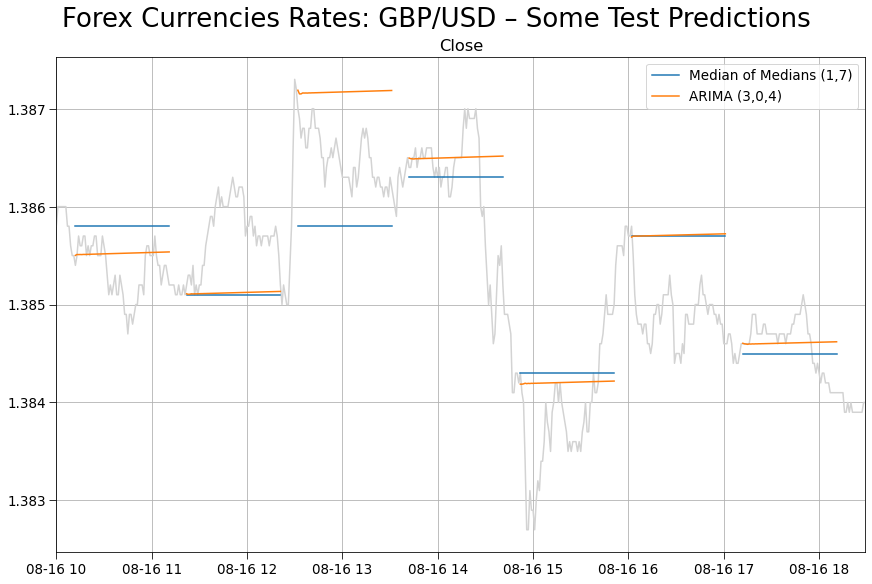

<IPython.core.display.Javascript object>

In [17]:
short_test_intv = tss.Interval(
    ts, datetime(2021, 8, 16, 10), datetime(2021, 8, 16, 18, 30)
)
fig_time_delta = timedelta(minutes=10)
fig = plot_ground_truth(
    short_test_intv,
    mode="test",
    data_type=data_type,
    data_name=data_name,
    color="lightgrey",
)
for ((model, version), preds), color in zip(test_preds.items(), mcolors.TABLEAU_COLORS):
    plot_model_test_prediction(
        short_test_intv,
        fig_time_delta,
        preds,
        model_name=model,
        model_version=version,
        fig=fig,
        color=color,
    )

display(fig)